# Lab | Customer Analysis Round 4

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

In [45]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.

In [46]:
# apply linear regression on the following data
data = pd.read_csv('marketing_customer_analysis(2).csv') # this file is inside files_for_lesson_and_activities folder
data_types= data.dtypes

#No puede utilizar esto 
#np.number
#np.object

summary = data._get_numeric_data().describe()

summary


,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [47]:
summary['months since last claim'].max()

10910.0

In [48]:
data.shape

(10910, 27)

In [49]:
data.describe

<bound method NDFrame.describe of        unnamed customer       state  customer lifetime value response  \
0            0  DK49336     Arizona              4809.216960       No   
1            1  KX64629  California              2228.525238       No   
2            2  LZ68649  Washington             14947.917300       No   
3            3  XL78013      Oregon             22332.439460      Yes   
4            4  QA50777      Oregon              9025.067525       No   
...        ...      ...         ...                      ...      ...   
10905    10905  FE99816      Nevada             15563.369440       No   
10906    10906  KX53892      Oregon              5259.444853       No   
10907    10907  TL39050     Arizona             23893.304100       No   
10908    10908  WA60547  California             11971.977650       No   
10909    10909  IV32877      Unknow              6857.519928   Unknow   

       coverage education effective to date employmentstatus gender  ...  \
0         Bas

In [50]:
summary.head()

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed                        10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

In [52]:
data_numerical= data.select_dtypes(include=[np.number])
#data_objects= data.select_dtypes('objects')

In [53]:
data_numerical

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


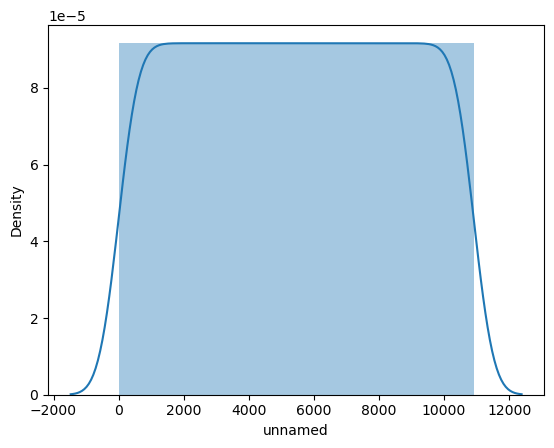

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


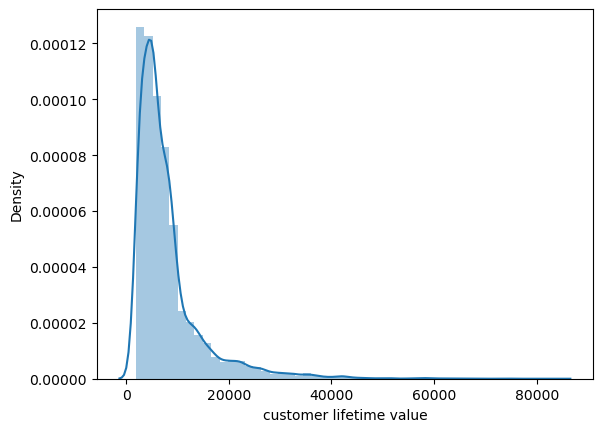

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


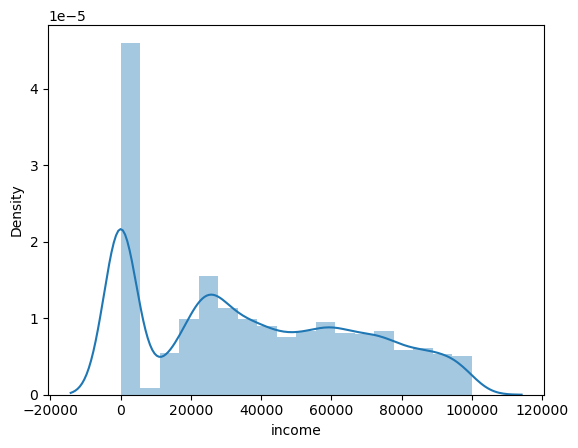

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


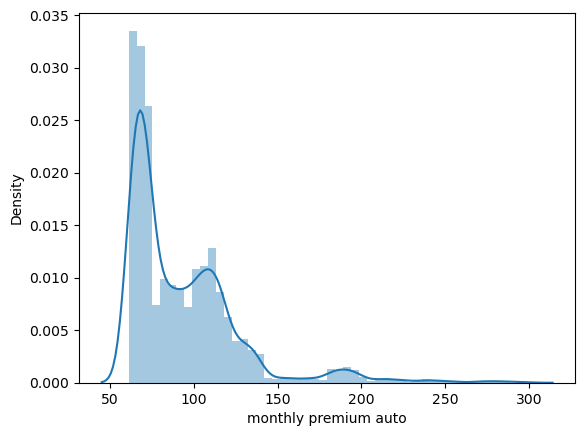

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


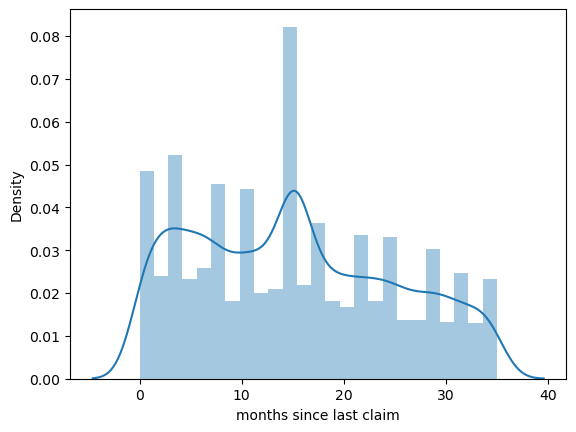

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


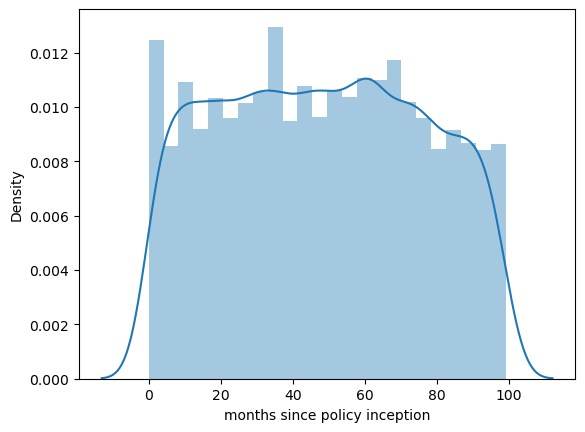

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


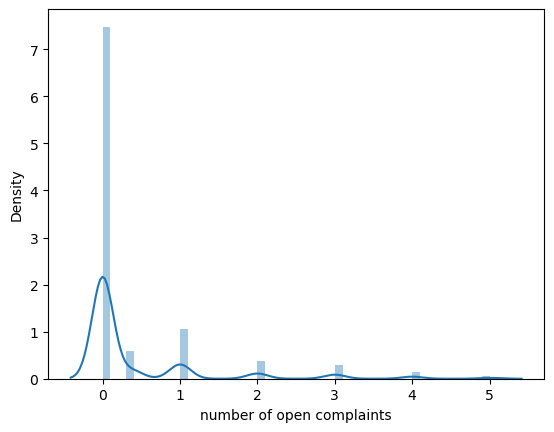

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


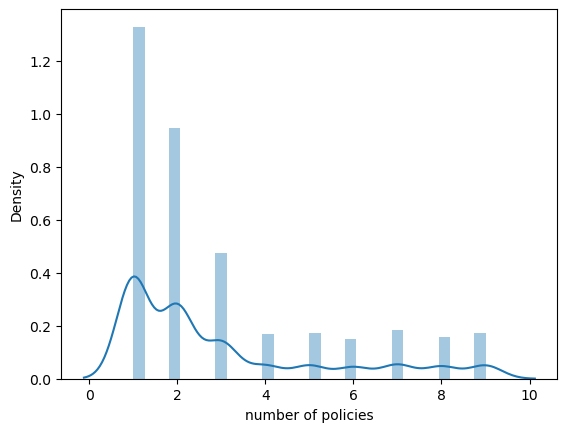

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


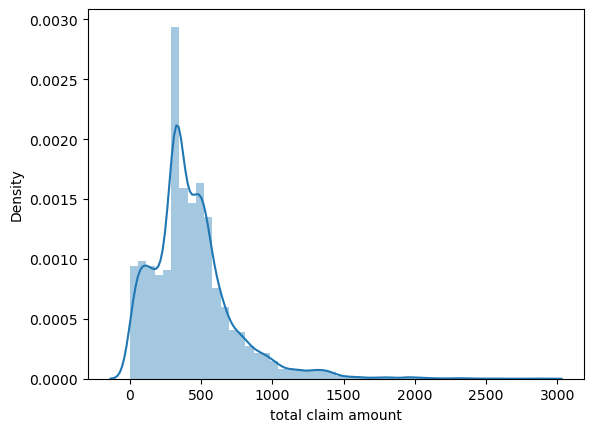

C:\Users\aguva\AppData\Local\Temp\ipykernel_14660\674393070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numerical[column])


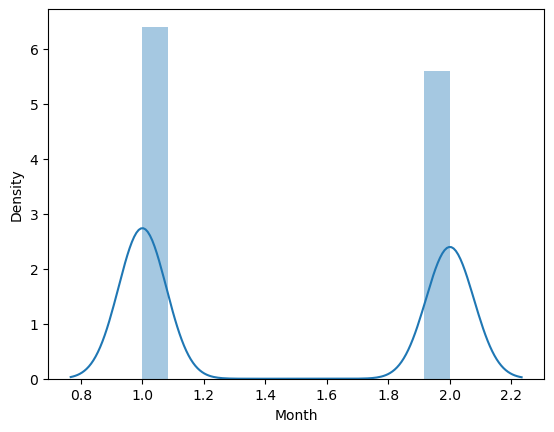

In [54]:
for column in data_numerical.columns:
    sns.distplot(data_numerical[column])
    plt.show()


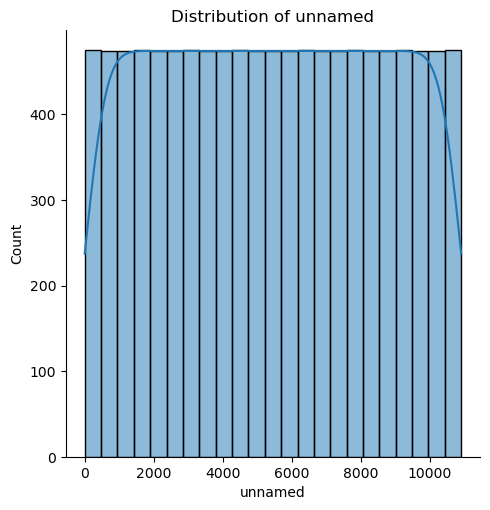

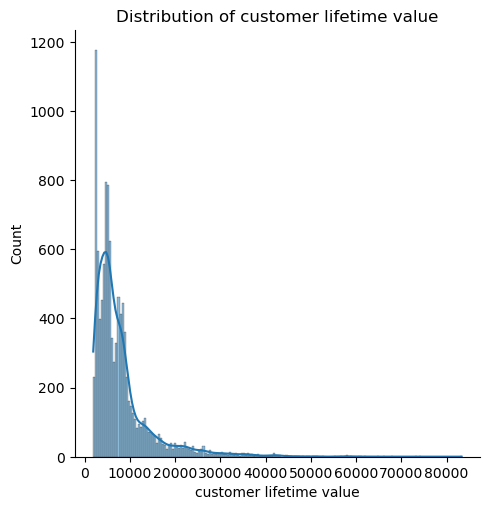

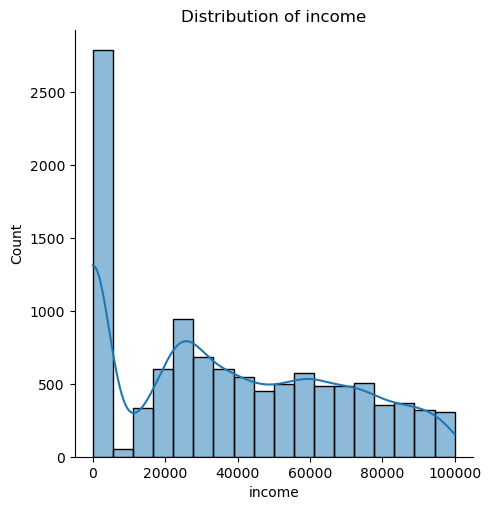

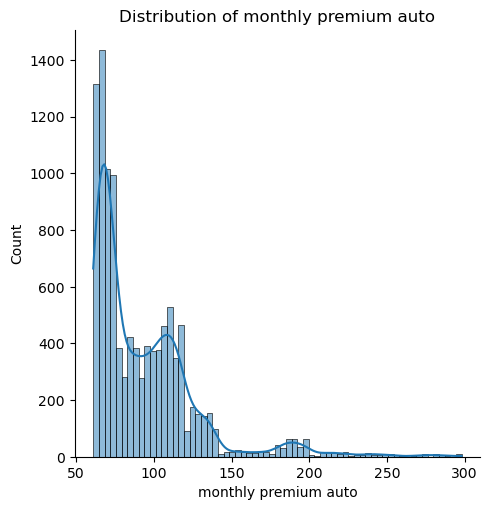

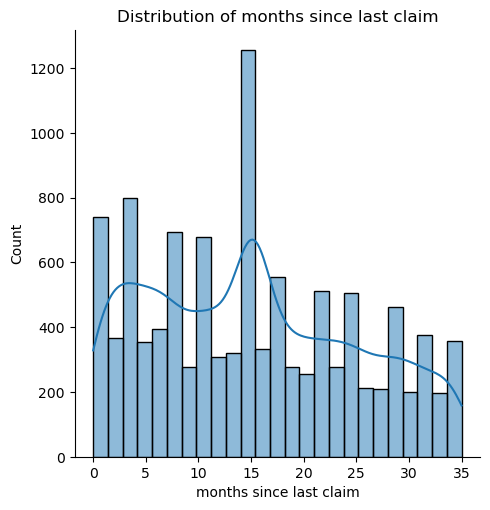

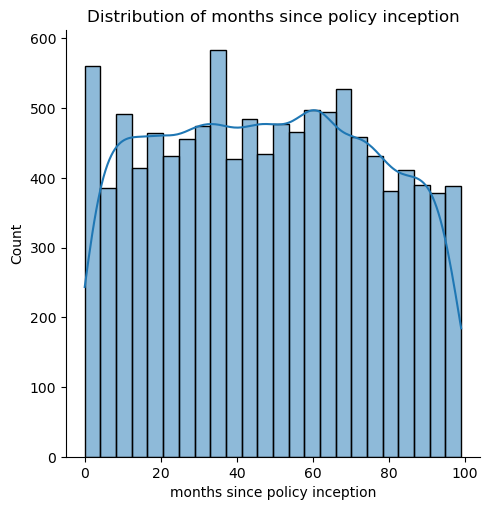

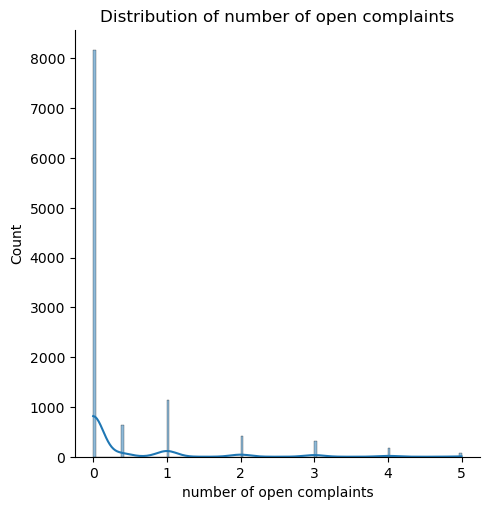

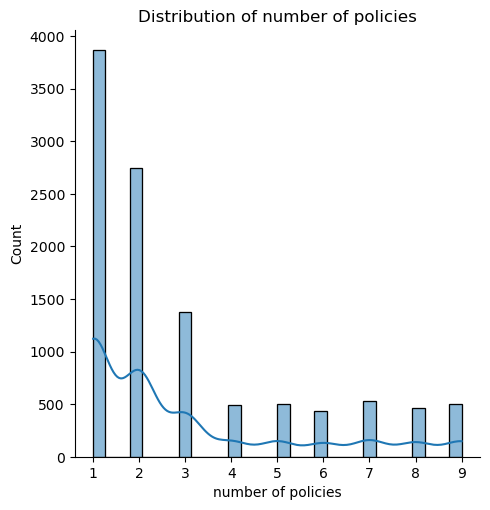

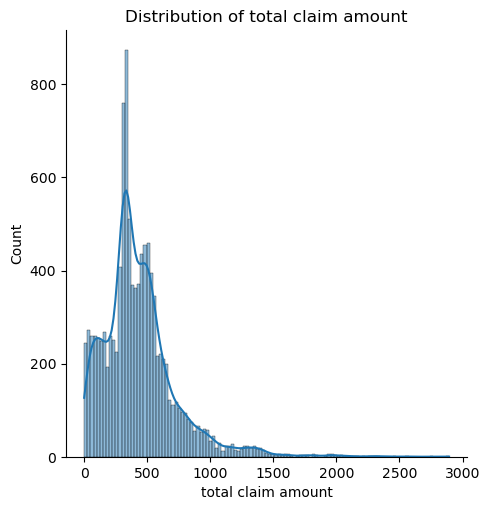

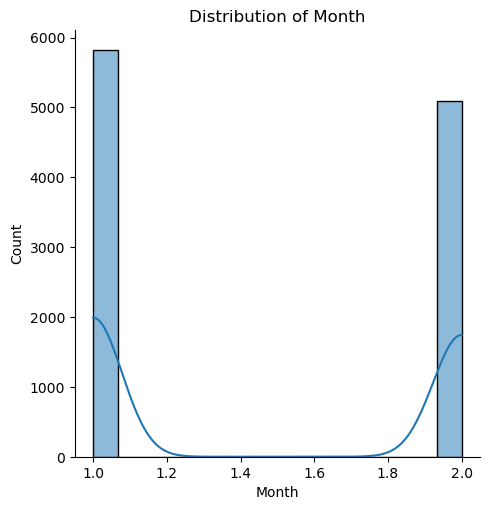

In [55]:
# Use seaborn library to construct distribution plots for the numerical variable
for column in data_numerical.columns:
    sns.displot(data_numerical[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


In [56]:
data_numerical.columns

Index(['unnamed', 'customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'Month'],
      dtype='object')

In [57]:
data_numerical['months since last claim']= pd.to_datetime(data_numerical['months since last claim'])

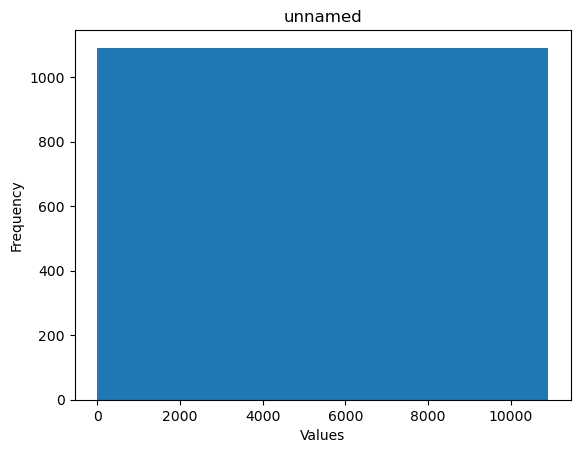

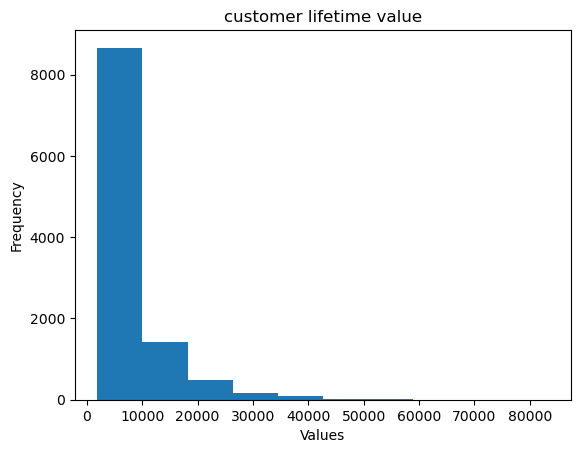

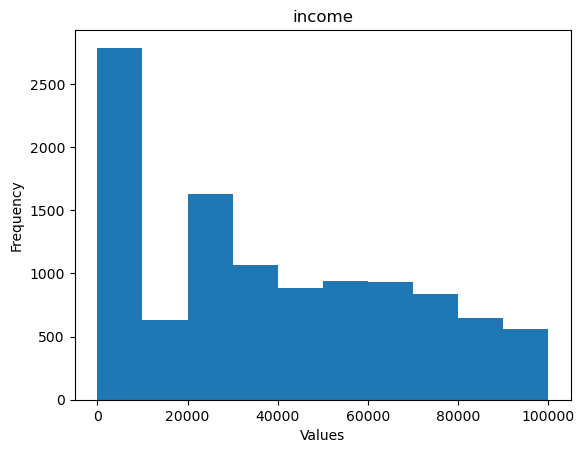

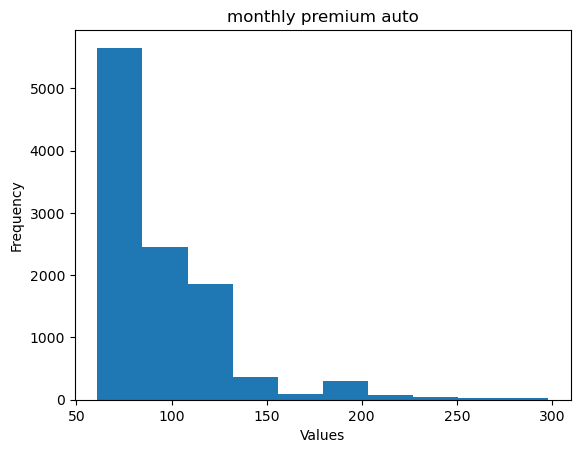

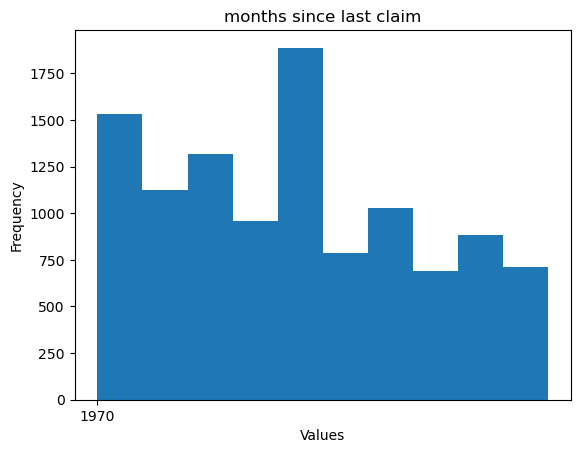

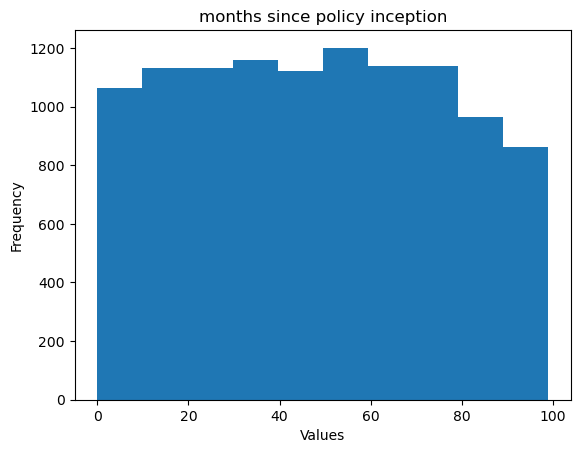

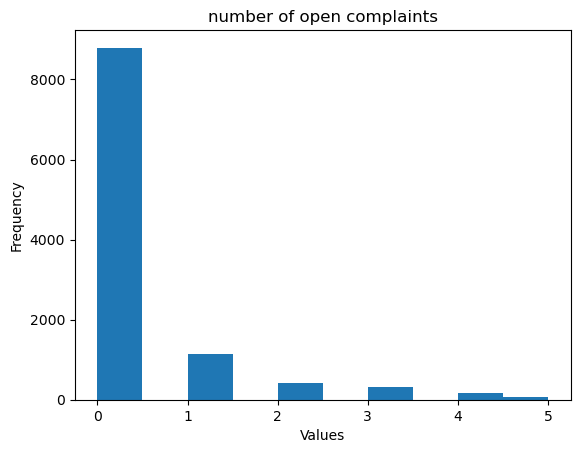

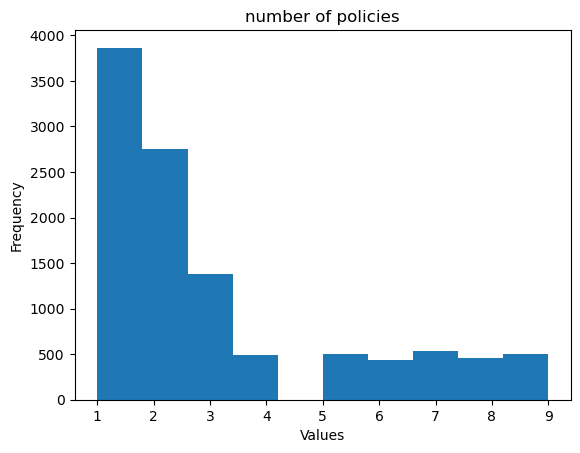

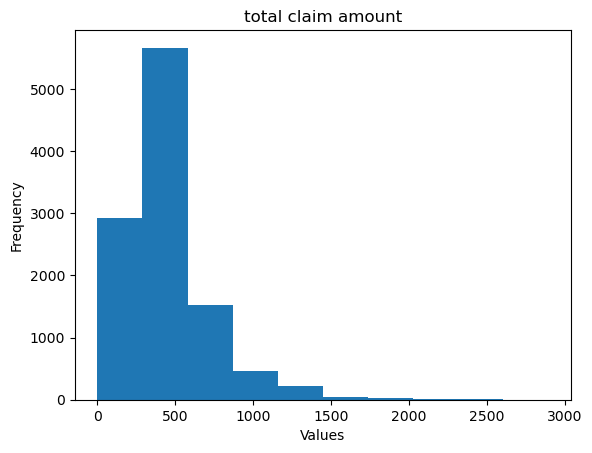

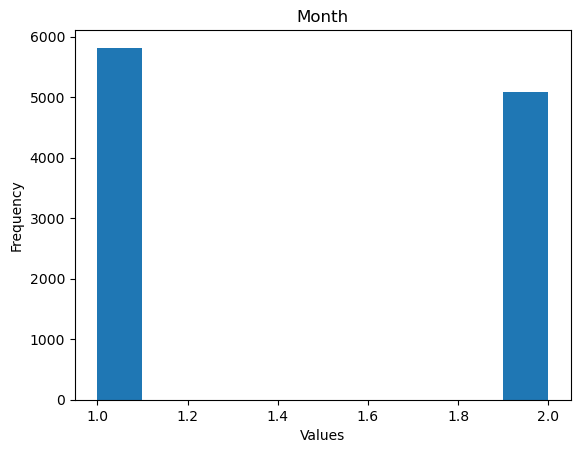

In [58]:
# Use Matplotlib to construct histograms

for column in data_numerical.columns:
    plt.hist(data_numerical[column], bins=10)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [59]:
corr_matrix = data_numerical.corr(numeric_only=True)

<Axes: >

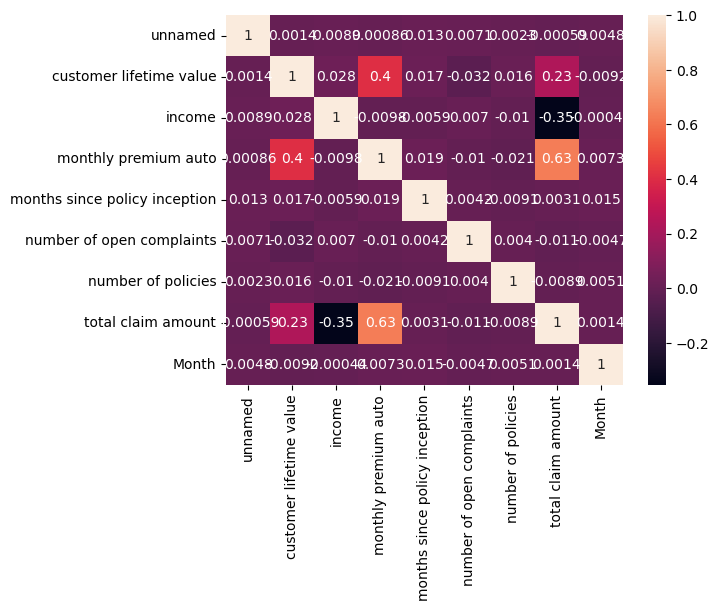

In [60]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

In [61]:
corr_matrix

,unnamed,customer lifetime value,income,monthly premium auto,months since policy inception,number of open complaints,number of policies,total claim amount,Month
unnamed,1.000000,0.001355,0.008910,0.000863,0.012795,0.007108,0.002319,-0.000593,0.004755
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.018953,-0.010066,-0.020505,0.631799,0.007253
months since policy inception,0.012795,0.016960,-0.005903,0.018953,1.000000,0.004247,-0.009123,0.003095,0.015163
number of open complaints,0.007108,-0.031501,0.006956,-0.010066,0.004247,1.000000,0.003964,-0.011025,-0.004671
number of policies,0.002319,0.016024,-0.009960,-0.020505,-0.009123,0.003964,1.000000,-0.008923,0.005127
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.003095,-0.011025,-0.008923,1.000000,0.001425
Month,0.004755,-0.009234,-0.000443,0.007253,0.015163,-0.004671,0.005127,0.001425,1.000000


In [62]:
data_numerical2= data_numerical.drop(columns= ['customer lifetime value', 'total claim amount'])

corr_matrix2 = data_numerical2.corr(numeric_only=True)

corr_matrix

,unnamed,customer lifetime value,income,monthly premium auto,months since policy inception,number of open complaints,number of policies,total claim amount,Month
unnamed,1.000000,0.001355,0.008910,0.000863,0.012795,0.007108,0.002319,-0.000593,0.004755
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.018953,-0.010066,-0.020505,0.631799,0.007253
months since policy inception,0.012795,0.016960,-0.005903,0.018953,1.000000,0.004247,-0.009123,0.003095,0.015163
number of open complaints,0.007108,-0.031501,0.006956,-0.010066,0.004247,1.000000,0.003964,-0.011025,-0.004671
number of policies,0.002319,0.016024,-0.009960,-0.020505,-0.009123,0.003964,1.000000,-0.008923,0.005127
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.003095,-0.011025,-0.008923,1.000000,0.001425
Month,0.004755,-0.009234,-0.000443,0.007253,0.015163,-0.004671,0.005127,0.001425,1.000000


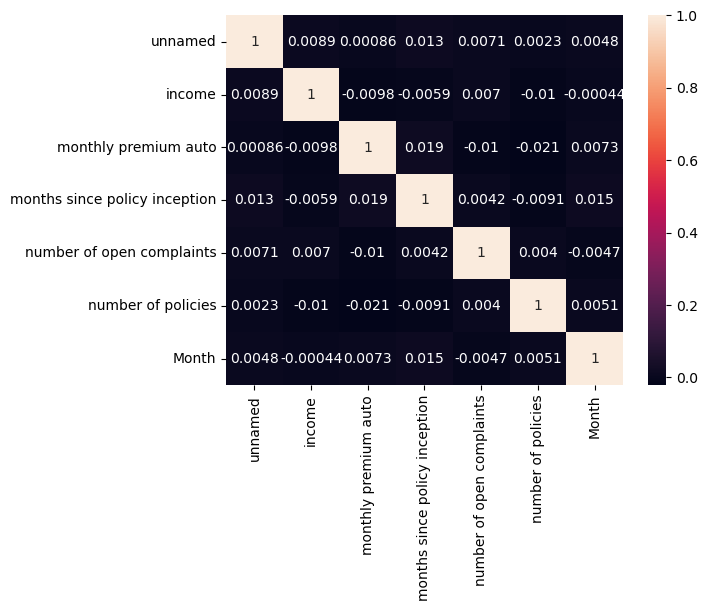

In [63]:
sns.heatmap(corr_matrix2, annot=True)
plt.show()